In [14]:
import numpy as np
import pandas as pd
import random as rn

class Perceptron(object):

    def __init__(self, no_of_inputs, iterations=100, learning_rate=0.1):
        self.iterations = iterations
        self.weights = np.zeros(no_of_inputs + 1)
        self.lr = learning_rate
    
    def randomize(self, X, y):
        len1 = len(X)
        idx = np.array(range(len1))
        rn.shuffle(idx)
        X = X[idx]
        y = y[idx]
        return X, y
        
    def predict(self, inputs):
        
        results = []
        for item in inputs:
            pred = np.dot(item, self.weights[1:]) + self.weights[0]  ## x1*w1+x2*w2+...xn*wn + b(bias)
            results.append(np.sign(pred))
        return results

    def train(self, training_inputs, labels):
        for _ in range(self.iterations):
#             training_inputs, labels = self.randomize(training_inputs, labels)
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict([inputs])
                
#                 self.weights[1:] += lr (label - prediction) * inputs
#                 self.weights[0] +=  (label - prediction)
                
                if prediction[0]*label<=0:
                    self.weights[1:] += self.lr*np.dot(inputs, label)
                    self.weights[0] +=  label

In [2]:
heart = pd.read_csv("data.csv")
print(heart.head())


         ID Diagnosis      3      4       5       6        7        8       9  \
0    842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        10  ...     23     24      25      26      27      28      29      30  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       31  Unnamed: 31  
0

### Data preprocessing
#### Remove ID and Label (diagnosis)

In [3]:
X = heart.drop(['ID', 'Diagnosis'], axis=1)
y = heart['Diagnosis']
y = y.apply(lambda x: 1 if x=='M' else -1)

### Data partition

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.20)

### Train on the training data using Perceptron

In [5]:
perceptron = Perceptron(X_train.shape[1], iterations=100)
perceptron.train(X_train, y_train)
y_pred = perceptron.predict(X_test) 


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[52 23]
 [ 2 37]]
              precision    recall  f1-score   support

          -1       0.96      0.69      0.81        75
           1       0.62      0.95      0.75        39

    accuracy                           0.78       114
   macro avg       0.79      0.82      0.78       114
weighted avg       0.84      0.78      0.79       114



## Other example

In [37]:
from sklearn import preprocessing
normalized=True

def convert(item, x):
    return x.index(item)

heart = pd.read_csv("crx.csv")
X = heart.drop(['att1', 'label'], axis=1)

## For those the data are non-computatable types
feat = ['att2', 'att4','att5','att6', 'att7', 'att9', 'att10', 'att12','att13','att14']
for key in feat:
    sets = list(np.unique(X[key].values)) # Check the minimal set
    X[key] = X[key].apply(lambda x:convert(x, sets)) ## string==>int mapping
y = heart['label']
y = y.apply(lambda x: 1 if x=='+' else -1)
# print(X)


if normalized:
    x = X.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values, 
                                                    test_size = 0.20,
                                                    random_state=666)


perceptron = Perceptron(X_train.shape[1], iterations=5, 
                        learning_rate=0.01)
perceptron.train(X_train, y_train)
y_pred = perceptron.predict(X_test) 


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[65 13]
 [14 46]]
              precision    recall  f1-score   support

          -1       0.82      0.83      0.83        78
           1       0.78      0.77      0.77        60

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



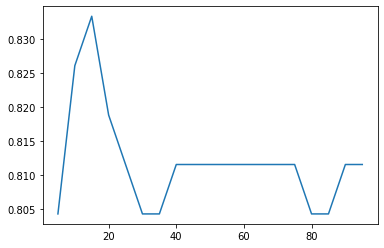

In [32]:
from sklearn.metrics import accuracy_score as accuracy
from matplotlib import pyplot as plt

acclist = []
for iters in range(5, 100, 5):
    perceptron = Perceptron(X_train.shape[1], iterations=iters, 
                            learning_rate=0.01)
    perceptron.train(X_train, y_train)
    y_pred = perceptron.predict(X_test) 

    acclist.append(accuracy(y_test,y_pred))
    
plt.plot(range(5, 100, 5), acclist)
plt.show()

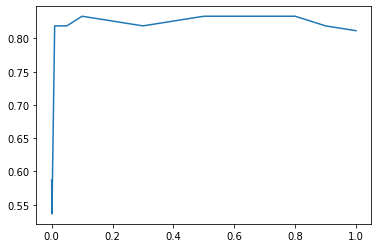

In [35]:
acclist = []
for lrs in [1,0.9,0.8,0.5,0.3,0.1,0.05,0.01,0.001,0.0001]:
    perceptron = Perceptron(X_train.shape[1], iterations=17, 
                            learning_rate=lrs)
    perceptron.train(X_train, y_train)
    y_pred = perceptron.predict(X_test) 

    acclist.append(accuracy(y_test,y_pred))
    
plt.plot([1,0.9,0.8,0.5,0.3,0.1,0.05,0.01,0.001,0.0001], acclist)
plt.show()